In [3]:
# ======================================================================================
# Notebook setup
# 
# Run this cell before all others to make sure that the Jupyter notebook works properly
# ======================================================================================

# Automatically reload all imported modules
%load_ext autoreload
%autoreload 2

figsize = (20, 5)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Linear Regression

## Loading the Data

**Let's start by loading the housing dataset again**

In [4]:
import pandas as pd
import os
fname = os.path.join('..', 'data', 'real_estate.csv')
data = pd.read_csv(fname, sep=',')
data.head() # Head returns the first 5 elements

,house age,dist to MRT,#stores,latitude,longitude,price per area
0,14.8,393.2606,6,24.96172,121.53812,7.6
1,17.4,6488.0210,1,24.95719,121.47353,11.2
2,16.0,4066.5870,0,24.94297,121.50342,11.6
3,30.9,6396.2830,1,24.94375,121.47883,12.2
4,16.5,4082.0150,0,24.94155,121.50381,12.8


* Our goal is to learn a model that can estimate "price per area"
* But how do we achieve that?

**The first step is using Maths to formalize the problem**

## Input, Output, Examples, Targets

**Formally, we say that:**

* All columns except the price represent the _input $x$_ of our model
  - Inputs are often referred to as _attributes_
* The price represents the _output $y$_ of our model
* Each row in the table represents one data point, i.e. an _example $(x_i, y_i)$_
  - $x_i$ is the input value for the $i$-th example
  - $y_i$ is the true output value (or _target_) for the $i$-th example

**Our goal is to learn a model $f$ such that**

* When we feed the input $x_i$ of each example to it
* ...The output value $y_i = f(x_i)$ is as close as possible to $y_i$

**This kind of _task_ is known in ML as _supervised learning_**
 

## Supervised Learning and Regression

**Supervised Learning is among the most common forms of ML**

Our _model_ is a function $f(x; \theta)$ with input $x$ and _parameters $\theta$_

* If the output is numeric, we speak of _regression_
* ...And we can define the approximation error over the example using, e.g.:

$$
\mathit{MSE}(\theta) = \frac{1}{m}\sum_{i=1}^m \left(f(x_i,; \theta) - y_i\right)^2
$$

* "MSE" stands for _Mean Squared Error_ and it's a common error metric

**Training in a (MSE) regression problem consists in solving**

$$
\text{argmin}_\theta \, \mathit{MSE}(\theta)
$$


* I.e. choosing the parameters $\theta$ to minimize approximation error

## Supervised Learning...And Linear Regression

**We speak instead of _Linear Regression_**

...When $f$ is defined as a _linear combination_ of _features_

$$
f(x; \theta) = \sum_{i=1}^n \theta_j \phi_j(x)
$$

* In general, a feature is any function that ca n eb

**In our case each basis function will correspond to _a specific input column_**

...Plus a fixed term (think of that as a "1")

$$\begin{align}
f(x; \theta) &= \theta_0 + \theta_1 \{\mathit{age}\} + \theta_2 \{\mathit{MRT dist.}\} + \theta_3 \{\mathit{n. stores}\} + \\
&\ \theta_4 \{\mathit{latitude}\} + \theta_5 \{\mathit{longitude}\}
\end{align}$$

* The fixed terms is called the _intercept_

## Supervised Learning...And Linear Regression

**We speak instead of _Linear Regression_**

...When $f$ is defined as a _linear combination of basis functions_

$$
f(x; \theta) = \sum_{i=1}^n \theta_j \phi_j(x)
$$

**Linear regression is one of the simplest supervised learning approaches**

...But it is still a very good example!

* Since the model itself is relatively simple
* ...It will allow us to focus on the _key challenges_ when using ML

## Separating Input and Output

**Our first step will be separating our input and output**

In [6]:
cols = data.columns # columns in the dataframe
X = data[cols[:-1]] # all columns except the last one
X.head()

,house age,dist to MRT,#stores,latitude,longitude
0,14.8,393.2606,6,24.96172,121.53812
1,17.4,6488.0210,1,24.95719,121.47353
2,16.0,4066.5870,0,24.94297,121.50342
3,30.9,6396.2830,1,24.94375,121.47883
4,16.5,4082.0150,0,24.94155,121.50381


**We will focus on predicting the logarithm of the price per area**

In [7]:
import numpy as np
y = np.log(data[cols[-1]]) # just the last column

* In practice, it's like predicting the order of magnitude

## Training and Test Set

**The model we learn should work well on _all relevant data_**

Formally, the model should _generalize_ well

* How do we check whether this is the case?
* A typical approach: partitioning our dataset

**The basic idea is to split our data in two groups**

* The first group will actually be used for training
  - This will be called the _training set_
* The second group will be used only _for model evaluation_
  - This will be called the _test set_ (or _holdout set_)

**With this trick, we can assess our model performance on _unseen data_**

## Training and Test Set

**There are a couple of catches**

For this to work:

* The examples in the training set and the test set should be similar
* The test data should be a good match for the data we'll use for real

Ideally, we should have that:

> **The training data should be _representative of the true population_**

This is the golden rule for building a training set

* Sometimes that's relatively easy to do
* ...But sometimes it may be difficult or impossible

## Training and Test Set

**For learning our model, we will use [scikit-learn](https://scikit-learn.org/)**

...Which provides a function to handle _shuffling_ and _training/test splitting_:

In [8]:
from sklearn.model_selection import train_test_split

X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=0.34, random_state=42)

print(f'Size of the training set: {len(X_tr)}')
print(f'Size of the test set: {len(X_ts)}')

Size of the training set: 273
Size of the test set: 141


The function `train_test_split`

* Randomly shuffles the data (optionally with a fixed seed `random_state`)
* Puts a fraction `test_size` of the data in the test set
* ...And the remaining data in the training set
* Both the input and the output data is processed in this fashion

## Training and Test Set

**Using separate test set is _extremely important_**

...Because we want our model to work on _new data_

* We have no use for a model that _learns the input data perfectly_
* ...But that _behaves poorly on unseen data_
* In these cases, we say that the model _does not generalize_

By keeping a separate test set we can simulate this evaluation

**However, beware of exceptions!**

Sometimes, you it impossible to guarantee train/test similarity

* E.g. when making forecasts over time, the _historical_ system behavior
* ...Can be different from the _future_ system behavior
* In that case, the train/test split should simulate the expected difference

The trick is to think of what the train and test data will be _at deployment time_

## Fitting the Model

**We can now train a linear model**

In [9]:
from sklearn.linear_model import LinearRegression

m = LinearRegression()
m.fit(X_tr, y_tr)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


We obtain the estimated output via the `predict` method:

In [10]:
y_pred_tr = m.predict(X_tr)
y_pred_ts = m.predict(X_ts)

* The predictions (unlike the targets) are not guaranteed to be integers
* ...But that is still fine, since it's easy to interpret them

## Evaluation

**Finally, we need to evaluate the prediction quality**

A common approach is using metrics. Here are a few examples:

* The _Mean Absolute Error_ is given by:
$$
\mathit{MAE} = \frac{1}{m}\sum_{i=1}^m \left|f(x_i) - y_i\right|
$$
* The _Root Mean Squared Error_ is given by:
$$
\mathit{RMSE} = \sqrt{\frac{1}{m} \sum_{i=1}^m (f(x_i) - y_i)^2}
$$

Both the RMSE and MAE are relativey easy to read

* They are expresses in the same unit as the original variable

## Evaluation


* The coefficient of determination ($R^2$ coefficient) is given by:
$$
R^2 = 1 - \frac{\sum_{i=1}^m (f(x_i) - y_i)^2}{\sum_{i=1}^m (y_i - \tilde{y})^2}
$$
where $\tilde{y}$ is the average of the $y$ values

**The coefficient of determination is a useful, but more complex metric:**

* Its maximum is 1: an $R^2 = 1$ implies perfect predictions
* Having a known maximum make the metric very readable
* It can be arbitrarily low (including negative)
* It can be subject to a lot of noise if the targets $y$ have low variance

**Using the MSE directly for evaluation is usually a bad idea**

...Since it is a square, and therefore not easy to parse for a human

## Evaluation

**Let's see the values for our example**

In [11]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print(f'MAE on the training data: {mean_absolute_error(y_tr, y_pred_tr):.3}')
print(f'MAE on the test data: {mean_absolute_error(y_ts, y_pred_ts):.3}')
print(f'RMSE on the training data: {np.sqrt(mean_squared_error(y_tr, y_pred_tr)):.3}')
print(f'RMSE on the test data: {np.sqrt(mean_squared_error(y_ts, y_pred_ts)):.3}')
print(f'R2 on the training data: {r2_score(y_tr, y_pred_tr):.3}')
print(f'R2 on the test data: {r2_score(y_ts, y_pred_ts):.3}')

MAE on the training data: 0.143
MAE on the test data: 0.177
RMSE on the training data: 0.207
RMSE on the test data: 0.253
R2 on the training data: 0.691
R2 on the test data: 0.645


* In general, we have better predictions on the training set than on the test set
* This is symptomatic of some _overfitting_
* I.e. we are learning patterns that don't translate to unseen data

Later on, we will see some techniques to deal with this situation

## Evaluation

**As an (important!) alternative to metrics, we can use _scatter plots_**

We can show the true vales on the x-axis, the predictions on the y-axis

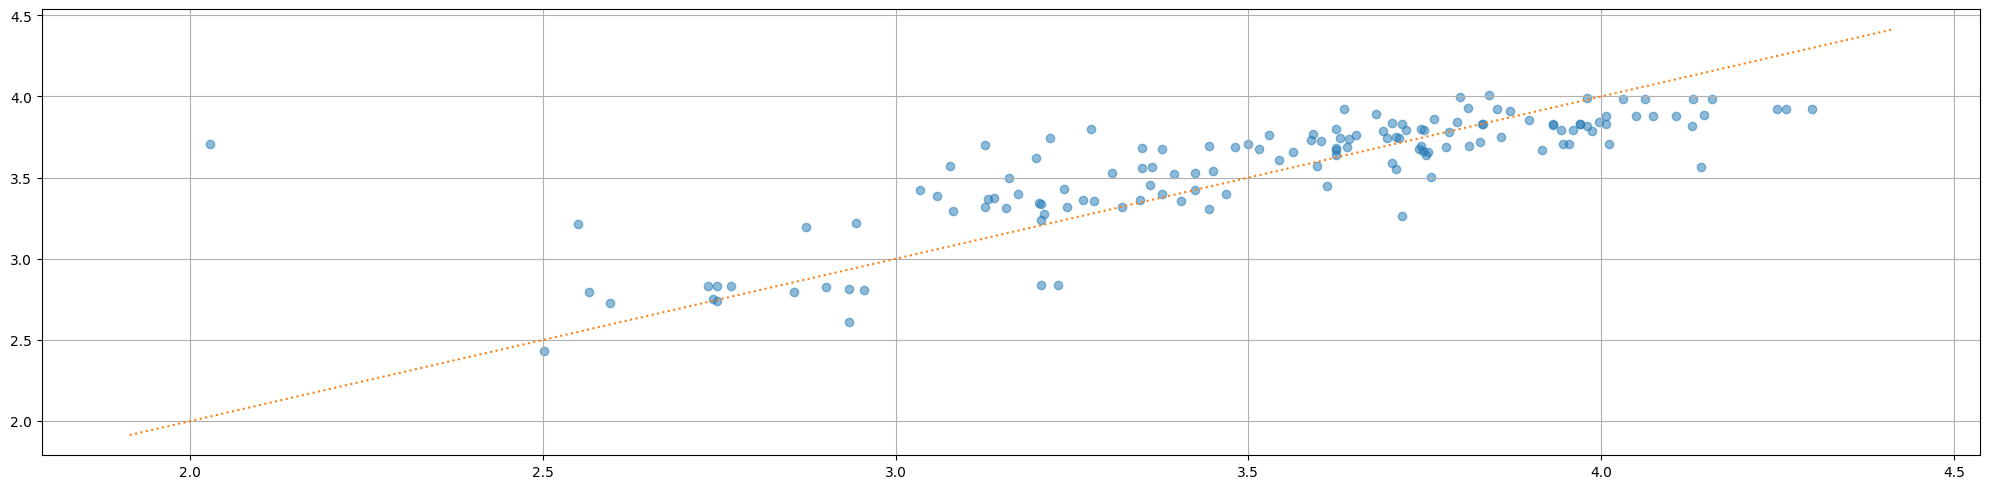

In [13]:
from matplotlib import pyplot as plt
plt.figure(figsize=figsize)
plt.scatter(y_ts, y_pred_ts, alpha=0.5)
plt.plot(plt.xlim(), plt.xlim(), linestyle=':', color='tab:orange')
plt.tight_layout(); plt.grid(':')

This gives us a better idea of which kind of mistakes the model is making

## Conclusions and Take-Home Messages

* Basic formulation of _supervised learning_
  - I.e. _learning a model_ from available examples
  - ...When the examples contain values for _both the input and the output_
* Basic linear regression model
  - One the _simplest approaches_ for supervised learning
  - I.e. the output is a _linear combination_ of the input values
  - Regression = we estimate a numeric quantity
* Train/test set split
  - Needed to evaluate our model on _unseen data_ (generalization)
* Evaluation of regression models
  - Make sure to compare the performance on _both training and test data_  
  - _Metrics_ (e.g. RMSE, MAE) provide a compact evaluation
  - _Scatter plot_ for a more fine-grained evaluation